### Random Sample Imputation.
* Aim: it is similar to mean/median/mode imputation but it takes random point the dataset and replaces the NAN values.

* when it should be used?
it assumes that data is completely at random(MCAR)

In [25]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [27]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [29]:
def impute_nan(df,var,median):
    df[var+'_median'] = df[var].fillna(median)
    df[var+'_random'] = df[var]
    # it will have the samples to fill the na.
    random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    # making the same index of random sample as the null value in the variable given.
    random_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+'_random'] = random_sample
    # return df


In [30]:
median = df['Age'].median()
median

28.0

In [31]:
impute_nan(df,'Age',median=median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

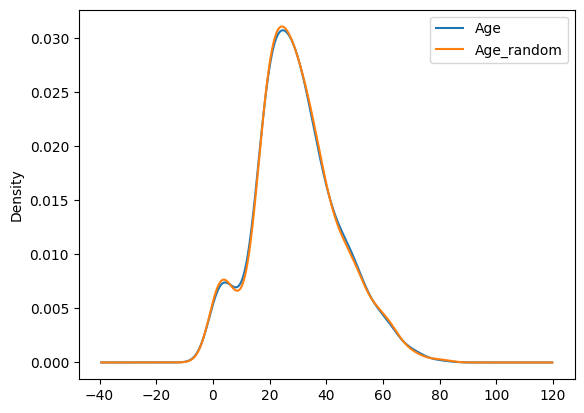

In [34]:
fig = plt.figure()
ax = fig.add_axes(111)
df['Age'].plot(kind='kde',ax = ax)
df.Age_random.plot(kind='kde',ax=ax)
lines, label = ax.get_legend_handles_labels()
ax.legend(lines,label,loc='best')

#### Advantages
1. Easy to implement.
2. There is less distortion in varience.

#### Disadvantage.
1. Every situation randomness won't work


#### Capturing Nan values with a new feature.
it works well when our data is not missing completely at random.

In [35]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
import numpy as np
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [37]:
df['Age'].fillna(df.Age.median(),inplace=True)

##### Advantage
1. Easy to implement
2. Captures the importance of missing values.

##### Disadvatange.
1. Create Additional Features (Curse of dimentionality)

### End of distribution imputation

In [38]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

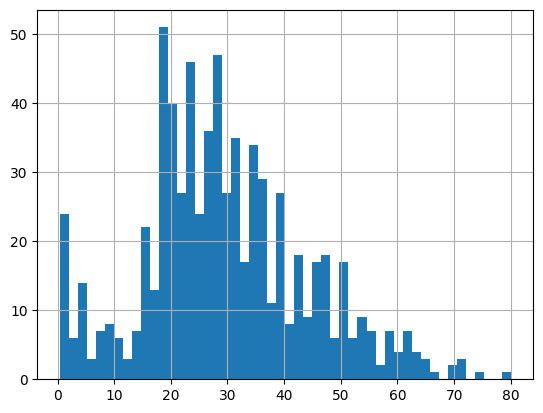

In [44]:
df.Age.hist(bins=50)

In [57]:
extreme = df.Age.mean()+3*df.Age.std()

<Axes: >

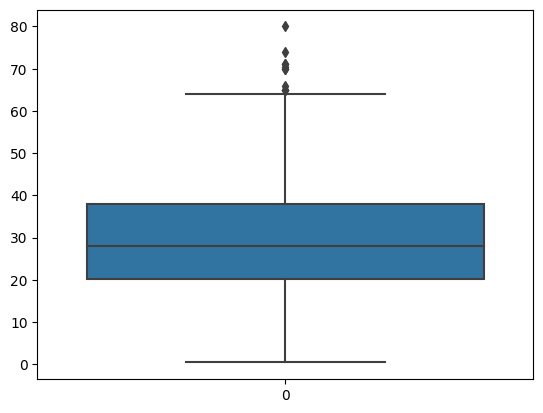

In [48]:
import seaborn as sns
sns.boxplot(df['Age'])

In [55]:
def impute_nan(df,var,median,extreme):
    df[var+'_end_distribution'] = df[var].fillna(extreme)
    df[var].fillna(median,inplace=True)

In [58]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [59]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

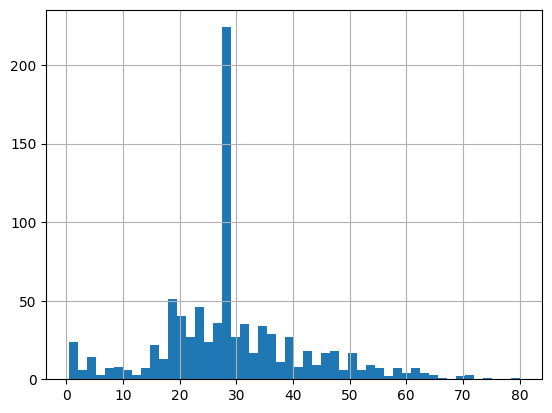

In [62]:
df.Age.hist(bins=50)

<Axes: >

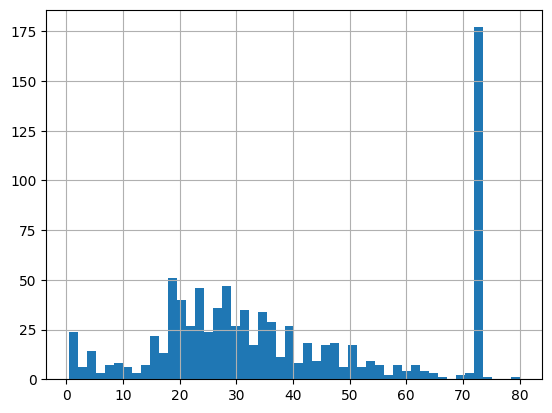

In [63]:
df['Age_end_distribution'].hist(bins=50)

<Axes: >

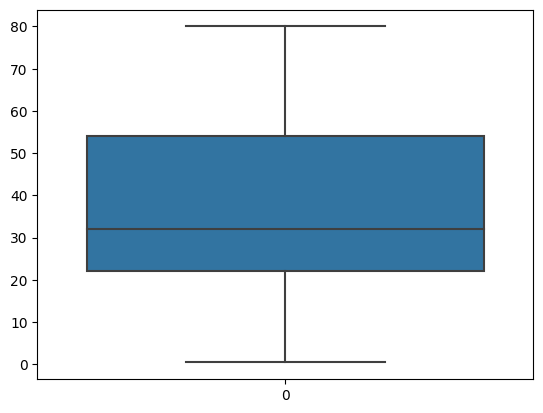

In [64]:
sns.boxplot(df['Age_end_distribution'])

#### Advantages
1. Easy to implement.
2. Capture the importance of the missingness.

#### Disadvatage.
1. Distort the original distribution of the variable.
2. if missingness is not important. then it can distort the distribution of the original variable and mask the predictive power.
3. if the number of na is big it will mask the outliers.j
4. if the number of na are less, then it will be considerared as outliers and in that case will be pre-processed in subsequent F-engineering.